# Linear Algebra Part 2

This is the second article in a three-part series about how to use numpy for linear algebra. If you havent read my first article, you can read it here. 

The first article focused on the basics on linear alegra in numpy, specifically representing vectors and matrices, performing simple arithmetic, dot & cross product, unit vectors and vector-vector/vector-matrix/matrix-matrix multiplication. This second article will tackle some intermediate concepts in linear algebra and how to solve them using numpy. 

The first thing we will focus on is solving a linear system, moving on to determinants & traces, inverse and transpose of matrices and finally ending with eigenvalues and eigenvectors. 

## Part 1: Solving a linear system

In school you were taught how to solve two equations with two unknowns using elimination and substitution. For example, lets say we have two equations:
$4x + 2y = 14$

$3x - 5y = -22$

We could solve these linear equations by elimination and subsititution to find $x = 1$ and $y = 5$

We can rewrite these equations in the form of a matrix:
$\begin{pmatrix}
    4 & 2 \\ 
    3 & -5
 \end{pmatrix}$$\begin{pmatrix} x \\ y \end{pmatrix}$ = $\begin{pmatrix} 14 \\ -22 \end{pmatrix}$
 
In reality we would rarely encouter a 2x2 matrix. More often than not, the matrices would be much bigger and trying to solve them using elimination and subsitution would get very complex very quickly. Converting them to matrices and then solving it makes it much easier. 

We can rewrite any system of linear equations like this: $AX = B$, where A is our $nxn$ matrix of coefficients (**Note the matrix does not have to be a square matrix {rows=columns}, but for this tutorial we will assume square matrices**), X is our $nx1$ vector of variables and B is our $nx1$ vector of output.

So how would you solve the above system equations when written in matrix form? 

First thing I want to introduce is this concept called <i><b>Augmented Matrix</b></i>. Augmented matrix is just a notational concept, where we rewrite the matrix equation ($AX = B$) in a way where its easy to solve. In augmented matrix terms, the above equations would be written like this:
$\begin{pmatrix}
    4 & 2 & | & 14 \\
    3 & -5 & | & -22
\end{pmatrix}$

Now to solve this system, we can use row operations to find the solution. I am not going to go over row operations, since the focus of this article is on solving systems of equations using numpy; however, if you want to read up about row operations and RROE form (Reduced Row Echelon Forms) you can do so [here](https://math.libretexts.org/Bookshelves/Algebra/Intermediate_Algebra_(OpenStax)/04%3A_Systems_of_Linear_Equations/4.06%3A_Solve_Systems_of_Equations_Using_Matrices).

In numpy, we have the `np.linalg.solve` function that helps us find the solution to a system of linear equations. 

In [1]:
# we first import numpy
import numpy as np 

In [2]:
# initialize each equation as a numpy array
a = np.array([[4,2],[3,-5]])
b = np.array([14,-22])

In [3]:
# use np.linalg.solve to find the solution
np.linalg.solve(a,b)

array([1., 5.])

As you can see, it gave us the same result as the elimination-substitution method. You can find more information about `linalg.solve` on numpy's website linked [here](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html). But the most important thing I want to call out about using the `linalg.solve` function is that it finds the exact solution, and in order to do that it has some requirements. It only accepts a <b>full rank</b> and a <b>square</b> matrix as "a". Full rank just means that all columns and/or rows are linearly independent. Some more information about rank can be found [here](https://stattrek.com/matrix-algebra/matrix-rank.aspx).

Like I said earlier, your system of equations doesnt have to be square or a full matrix, however, you wont be able to use the `linalg.solve` function to find a solution to that system of equations. 

You can find the rank of a matrix using the `np.linalg.matrix_rank` function.

In [4]:
np.linalg.matrix_rank(a)

2

Now the question arises, is there a way to figure out whether my square matrix is full rank? The answer to this question provides a great transition to our next topic which is <b>Determinants</b>. 

## Part 2: Determinants and Traces

In mathematics, the determinant is a scalar value that is a function of the entries of a square matrix.<sup>1</sup> 

As the definition states, determinants can only be calculated for a square matrix. I will illustrate 2 examples of how determinants are calculated for a 2x2 and a 3x3 matrix; the method remains the same for higher-order matrices, however, they get computationally harder as the number of rows and columns increases, and you will see why when we caluclate the determinant of a 3x3 matrix. 

Lets say A is a 2x2 matrix
$A_{2x2} = \begin{pmatrix} 
                2 & 6 \\
                1 & 2
           \end{pmatrix}$
           
The determinant of A, denoted as $det(A)$, for a 2x2 matrix is calculated by multiplying the diagonal enteries of the matrix and subtracting them. 

So in our example, $det(A) = (2*2) - (6*1) = -2$

Generalizing it to any 2x2 matrix:

$A_{2x2} = \begin{pmatrix} 
                a_{1,1} & a_{1,2} \\
                a_{2,1} & a_{2,2}
           \end{pmatrix}$
           
$det(A) = (a_{1,1} * a_{2,2}) - (a_{1,2} * a_{2,1})$

Moving on to a 3x3 matrix example:

$A_{3,3} = \begin{pmatrix} 
                1 & 6 & 3 \\
                3 & 2 & 5 \\
                8 & 9 & 9
           \end{pmatrix}$
           
Now it gets a little more complicated. 

For calcualting determinants of a 3x3 matrix, the first step is to pick any row. We will use the first one: $<1,6,3>$.

Next, we start with the firt value in that row which is 1. Now draw vertical and horizontal line segments through 1 and the matrix that remains is $\begin{pmatrix} 2 & 5 \\ 9&9 \end{pmatrix}$. Now we find the determinant of this matrix, which we know how to from the previous section. So the determinant of this matrix is $18-45 = -27$. And finally multiply this by 1, which was the first value in the row we selected. 

Now follow the same steps with 6 and then 3. What we get is an equation like this:
$det(A) = 1*det(\begin{pmatrix} 2&5 \\ 9&9 \end{pmatrix}) - 6*det(\begin{pmatrix} 3&5 \\ 8&9 \end{pmatrix}) + 3*det(\begin{pmatrix} 3&2 \\ 8&9 \end{pmatrix})$

Notice, we subtract the second term. The sign keeps alternating. 

So solving that equation we get:
$det(A) = 1*(18-45) - 6*(27-40) + 3*(27-16) = -27 + 78 + 33 = 84$ 

One thing to note is the determinant formula is agnostic of what row we choose to start with. Try finding the determinant of the above matrix, by starting with the second or third row and compare whether you get the same answer. 

Generalizing this to any 3x3 matrix:

$A_{3,3} = \begin{pmatrix} 
                a_{1,1} & a_{1,2} & a_{1,3} \\
                a_{2,1} & a_{2,2} & a_{2,3} \\
                a_{3,1} & a_{3,2} & a_{3,3}
           \end{pmatrix}$ 
           
$det(A) = a_{1,1}*det(\begin{pmatrix} 
                        a_{2,2} & a_{2,3} \\ 
                        a_{3,2} & a_{3,3} 
                      \end{pmatrix})
    - a_{1,2}*det(\begin{pmatrix} a_{2,1} & a_{2,3} \\ a_{3,1} & a_{3,3} \end{pmatrix}) 
    + a_{1,3}*det(\begin{pmatrix} a_{2,1} & a_{2,2} \\ a_{3,1} & a_{3,2} \end{pmatrix})$

The process remains the same for 4x4, 5x5 and higher order matrices, but as you can imagine, it gets more computionally difficult to do by hand when the number of rows and columns is large. Which is why we can rely on NumPy to do the calculations for us. NumPy has the `linalg.det` function that calculates the determinant of a matrix. 

In [5]:
# calculating the determinant for our 2x2 example
a = np.array([[2,6],[1,2]])

np.linalg.det(a)

-2.0

In [6]:
# calculating the determinant for our 3x3 example 
a = np.array([[1,6,3],[3,2,5],[8,9,9]])

np.linalg.det(a)

83.99999999999999

As you can see the value we got for our determinant of the 3x3 matrix is 83.9999999 and not 84. Why is that? That is due to the floating point error. I am not going to dig into that in this article, but heres a link if you want to know more about [it](https://www.geeksforgeeks.org/floating-point-error-in-python/).

Coming back to the question from the last section. How do we know if your square matrix is full rank? The answer to that is, your matrix is full rank if and only if the determinant is not zero. 

The next topic is `trace`. Trace is another operator that only exists for square matrices. It is defined as the sum of the values in the main diagonal and is denoted as `tr(A)`. 

So for a 3x3 matrix:
$A_{3,3} = \begin{pmatrix} 
                a_{1,1} & a_{1,2} & a_{1,3} \\
                a_{2,1} & a_{2,2} & a_{2,3} \\
                a_{3,1} & a_{3,2} & a_{3,3}
           \end{pmatrix}$ 
the trace of this matrix is $tr(A) = a_{1,1} + a_{2,2} + a_{3,3}$

Taking the 3x3 matrix example from the previous section. 
$A_{3,3} = \begin{pmatrix} 
                1 & 6 & 3 \\
                3 & 2 & 5 \\
                8 & 9 & 9
           \end{pmatrix}$
           
the trace of this matrix is $tr(A) = 1 + 2 + 9 = 12$

In numpy, you can use the `np.trace()` function to find it.

In [7]:
a = np.array([[1,6,3],[3,2,5],[8,9,9]])

np.trace(a)

12

There are many properties of traces, but I am only going to highlight couple of them here. One of the properties of trace is that it is a linear mapping. What that means is:
- $tr(A+B) = tr(A) + tr(B)$, where A and B are nxn matrix
- $c*tr(A) = tr(c*A)$, where c is a scalar constant

Lets illustrate the linear mapping property with some examples. We will take 2 2x2 matrices:

$A_{2,2} = \begin{pmatrix} 
                1 & 3 \\
                4 & 8
           \end{pmatrix}$
           
$B_{2,2} = \begin{pmatrix} 
                2 & 6 \\
                1 & 2
           \end{pmatrix}$

$c = 4$

In this case, the $tr(A) = 9$ and $tr(B)=4$, therefore $tr(A) + tr(B) = 13$. And $c*tr(A) = 36$. Lets check with numpy whether the trace of the sum of matrix A and B and multiplying with a scalar constant gives us the same answer. 

In [8]:
a = np.array([[1,3],[4,8]])
b = np.array([[2,6], [1,2]])

sum_matrix = a+b

np.trace(sum_matrix)

13

In [9]:
c = 4 
prod_matrix = c*a

np.trace(prod_matrix)

36

More comprehensive list of properties of traces can be found [here](https://en.wikipedia.org/wiki/Trace_(linear_algebra)).

## Part 3: Inverse and Transpose of Matrices

We will first look at Transpose of matrices. A simple concept, where we just replace the rows with the columns. 

Let A be a 3x3 matrix:
$A_{3,3} = \begin{pmatrix} 
                2 & 6 & 0 \\
                9 & 3 & 8 \\
                10 & 6 & 3
           \end{pmatrix}$
           
The transpose of this matrix, denoted as $A^{T}$ is $\begin{pmatrix} 
                2 & 9 & 10 \\
                6 & 3 & 6 \\
                0 & 8 & 3
           \end{pmatrix}$
           
In NumPy, you can use the `np.transpose` function. 

In [10]:
a = np.array([[2,6,0],[9,3,8],[10,6,3]])

np.transpose(a)

array([[ 2,  9, 10],
       [ 6,  3,  6],
       [ 0,  8,  3]])

Next we will talk about inverse of a matrix. This is an important concept since it shows up in many applications like linear regression and eigen decomposition <i>(both topics will be covered in the next article)</i>. The inverse of a matrix $A$ is denoted as $A^{-1}$. 

An n-by-n square matrix A is called invertible (also nonsingular or nondegenerate), if there exists an n-by-n square matrix B such that

$\mathbf {AB} =\mathbf {BA} =\mathbf {I} _{n}$ 
where $I_{n}$ denotes the n-by-n identity matrix and the multiplication used is ordinary matrix multiplication. If this is the case, then the matrix B is uniquely determined by A, and is called the (multiplicative) inverse of A, denoted by $A^{−1}$ 

Similar to an integer, when multiplied by its inverse gives you 1, multiplying a matrix by its inverse gives us the identity matrix. However, unlike integers not all matrices have an inverse. A matrix that does not have an inverse is called a <b>singular matrix</b>. A singular matrix occurs if and only if the determinant of the matrix is zero. <sup>2</sup>

Connecting this back to the discussion we had about rank in the first section, a square matrix is said to be not invertible if and only if the matrix does not have a full rank. And we know that a matrix that has a full rank also has a deteriminant greater than zero. 

Calculating the inverse of a 2x2 matrix is easy, but it gets computionally challenging with higher order matrices. However, NumPy makes it easier for us to calcualte the inverse of a matrix. You can use the `np.linalg.inv` function to find the inverse of a square matrix. 

In [11]:
# Calculating the inverse of a 3x3 matrix
a = np.array([[2,6,0],[9,3,8],[10,6,3]])

np.linalg.inv(a)

array([[-0.1625    , -0.075     ,  0.2       ],
       [ 0.22083333,  0.025     , -0.06666667],
       [ 0.1       ,  0.2       , -0.2       ]])

In [12]:
# Supplying a 2x2 matrix whose determinant is zero 
a = np.array([[2,3], [2,3]])

print("Determinant of matrix is: {}".format(np.linalg.det(a)))

try:
    np.linalg.inv(a)
except np.linalg.LinAlgError:
    print("Error finding Inverse")

Determinant of matrix is: 0.0
Error finding Inverse


In [13]:
# Multiplying the inverse of a matrix with the matrix gives us the identity matrix
a = np.array([[2,6,0],[9,3,8],[10,6,3]])

a_inv = np.linalg.inv(a)

np.matmul(a, a_inv)

array([[ 1.00000000e+00,  0.00000000e+00, -5.55111512e-17],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-1.66533454e-16,  0.00000000e+00,  1.00000000e+00]])

As you can see, barring the floating point error, multiplying $A$ and $A^{-1}$ gives us the identity matrix.

## Part 4: Eigenvalues and Eigenvectors

Our final topic for this article is eigenvalues and eigenvectors. 

The word <i>"eigen"</i> comes from the german word, meaning own. In linear algebra, an eigenvector $v$ of a linear transformation $T$, is a non-zero vector that doesnt change direction after the T linear transformation has been applied to it. It only changes magnitude by the factor of its eigenvalue <sup>3</sup>. 

What that means is, when a linear transformation, such as stretching, rotating etc, is applied to the vector, it does not change is original direction, just the magnitude by a factor of its eigenvalue. 

Algebraically, this can be written as: 

> $Av = \lambda v$

Where 𝐴 is $nxn$ matrix, $x$ is $nx1$ column vector ($X\neq0$), and $\lambda$ is some scalar. Any $\lambda$ that satisfies the above equation is known as an eigenvalue of the matrix $A$, while the associated vector $x$ is called an eigenvector corresponding to $\lambda$. <sup>4</sup>

You can solve the above equation manually to find all the eigenvectors and eigenvalues; to find how to do so you can check out this [link](https://lpsa.swarthmore.edu/MtrxVibe/EigMat/MatrixEigen.html). 

Lets take an example. Let $u$ and $v$ be two vectors in $R^{2}$. 

$u = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$ $v = \begin{bmatrix} 1 \\ 3 \end{bmatrix}$

If we apply the linear transformation $A = \begin{pmatrix} 2 & 2 \\ 5 & -1 \end{pmatrix}$ to both the vectors, the following change occurs:

{gif}

As you can see the vector $u$ did not change its original direction after the linear transformation was applied, it was merely scaled. The scaling factor is its eigenvalue. However, the vector $v$ did change its direction and magintude. So we can say, for the matrix $A$, there exists an eigenvector $u$. 

<i>(Note there might be more than one eigenvectors and in fact in this case, matrix $A$ does have more than one eigenvectors as we will see when we use python to find them)</i>

In NumPy, we can use the `linalg.eig` function to find the eignevalues and eigenvectors of a matrix. Note that this function also requires a <b>square matrix</b>. More information about the function, requirements and how it solves the equation can be found [here](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html).

In [14]:
# Use the above example 

a = np.array([[2,2],[5,-1]])

w, v = np.linalg.eig(a)

print("Eigenvalues are: ", w)
print("Eigenvectors are: ", v)

Eigenvalues are:  [ 4. -3.]
Eigenvectors are:  [[ 0.70710678 -0.37139068]
 [ 0.70710678  0.92847669]]


`linalg.eig` outputs two values. The first one, <i>w</i> is the list of eigenvalues, which in our case are 4 and -3. The second output is a matrix of the right eigenvectors normalized. And the way they are connected is as follows:
> the first column of the matrix, is the eigenvector that corresponds to the first eigenvalue. In other words, 4 is the eigenvalue whose corresponding eigenvector is [0.707, 0.707] 
> same thing follows the second eigenvector and column. 

Now in our example we said the vector $u$ was the eigenvector for the linear trasnformation for the matrix $A$. If we normalize the vector $u$, we would get the same result as the first column of the matrix above. And we can find the scaling factor and that would be equal to 4. 

Some important properties of eigenvalues and eigenvectors:
- Matrix $A$ and $A^{T}$ have the same eigenvectors. 
- Matrix $A$ and $A^{-1}$ have the same eigenvalues. 
- Sum of the eigenvalues is equal to the trace of the matrix.
- Product of the eigenvalues is equal to the determinant of the matrix. 

More properties and their proofs can be found [here](https://math.libretexts.org/Bookshelves/Linear_Algebra/Fundamentals_of_Matrix_Algebra_(Hartman)/04%3A_Eigenvalues_and_Eigenvectors/4.02%3A_Properties_of_Eigenvalues_and_Eigenvectors). 

Thanks for reading and hopefully you found this article useful. Any feedback is appreciated! 

My next article will focus on matrix decompositions and how linear algebra can be used to solve the linear regression problem. 

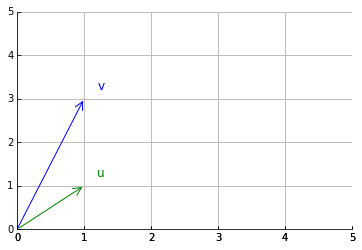

In [15]:
# Figure 3
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
#from mpl_toolkits.axisartist.axislines import AxesZero
from mpl_toolkits import axisartist
import imageio
import os 

u = np.array([1,1])
v = np.array([1,3])

lin_trans = np.array([[2,2],[5,-1]])

u_prime = np.matmul(lin_trans, u)
v_prime = np.matmul(lin_trans, v)

fig = plt.figure()
ax = fig.add_subplot(axes_class=axisartist.Axes)
ax.axis["y=0"] = ax.new_floating_axis(nth_coord=0, value=0,
                                        axis_direction="bottom")
ax.axis["y=0"].toggle(all=True)
# Make other axis invisible.
ax.axis["top", "right"].set_visible(False)

# One 
ax.annotate('',
        xytext=(0,0),
        xy=u, #(),
        arrowprops=dict(arrowstyle="->", color='green'),
        size=20
    )
ax.annotate(
        xy=(1.2,1.2),
        text='u',
        size=12,
        color='green'
    )
ax.annotate('',
        xytext=(0,0),
        xy=v, #(0.0,4.0),
        arrowprops=dict(arrowstyle="->", color='blue'),
        size=20
    )
ax.annotate(
        xy=(1.2,3.2),
        text='v',
        size=12,
        color='blue'
    )

plt.grid()
plt.xlim(0,5)
plt.ylim(0,5)

plt.savefig('1.png')

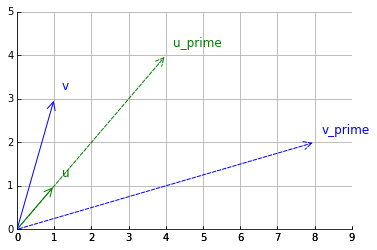

In [16]:
fig = plt.figure()
ax = fig.add_subplot(axes_class=axisartist.Axes)
ax.axis["y=0"] = ax.new_floating_axis(nth_coord=0, value=0,
                                        axis_direction="bottom")
ax.axis["y=0"].toggle(all=True)
# Make other axis invisible.
ax.axis["top", "right"].set_visible(False)

# Two 
ax.annotate('',
        xytext=(0,0),
        xy=u, #(),
        arrowprops=dict(arrowstyle="->", color='green'),
        size=20
    )
ax.annotate(
        xy=(1.2,1.2),
        text='u',
        size=12,
        color='green'
    )
ax.annotate('',
        xytext=(0,0),
        xy=u_prime, #(),
        arrowprops=dict(arrowstyle="->", linestyle='--', color='green'),
        size=20
    )
ax.annotate(
        xy=(4.2,4.2),
        text='u_prime',
        size=12,
        color='green'
    )

ax.annotate('',
        xytext=(0,0),
        xy=v, #(0.0,4.0),
        arrowprops=dict(arrowstyle="->", color='blue'),
        size=20
    )
ax.annotate(
        xy=(1.2,3.2),
        text='v',
        size=12,
        color='blue'
    )

ax.annotate('',
        xytext=(0,0),
        xy=v_prime, #(0.0,4.0),
        arrowprops=dict(arrowstyle="->", linestyle='--', color='blue'),
        size=20
    )
ax.annotate(
        xy=(8.2,2.2),
        text='v_prime',
        size=12,
        color='blue'
    )

plt.grid()
plt.xlim(0,9)
plt.ylim(0,5)

plt.savefig('2.png')

In [17]:
# Build GIF
filename = []
for i in range(10):
    filename.append('1.png')

for i in range(10):
    filename.append('2.png')


with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in filename:
        image = imageio.imread(filename)
        writer.append_data(image)


<sup>1</sup>https://en.wikipedia.org/wiki/Determinant

<sup>2</sup>https://en.wikipedia.org/wiki/Invertible_matrix#Examples

<sup>3</sup> https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors

<sup>4</sup> https://pythonnumericalmethods.berkeley.edu/notebooks/chapter15.01-Eigenvalues-and-Eigenvectors-Problem-Statement.html